In [ ]:
pip install auto-sklearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pprint import pprint

# **Binary Classification Task using Heart disease prediction dataset**
https://archive.ics.uci.edu/ml/datasets/Heart+Disease
---



In [ ]:
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
X=df.drop(['target'],axis=1)
y=df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [ ]:
import autosklearn.classification
automl = autosklearn.classification.AutoSklearnClassifier(
time_left_for_this_task=5*60,per_run_time_limit=30,tmp_folder='/temp/autosklearn_classification_example_tmp')
automl.fit(X_train, y_train)

AutoSklearnClassifier(per_run_time_limit=30, time_left_for_this_task=300,
                      tmp_folder='/temp/autosklearn_classification_example_tmp')

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight                type    cost  duration
model_id                                                             
43           1             0.08                 mlp  0.1625  1.569864
52           2             0.06  passive_aggressive  0.1625  0.897538
41           3             0.04       random_forest  0.1625  1.496750
25           4             0.24            adaboost  0.1625  1.300079
62           5             0.02        bernoulli_nb  0.1750  0.892822
47           6             0.02  passive_aggressive  0.1750  1.029115
71           7             0.04       liblinear_svc  0.1750  0.873132
51           8             0.04                 mlp  0.1875  1.355503
54           9             0.06        bernoulli_nb  0.2125  0.981869
55          10             0.02                 mlp  0.2125  1.556027
67          11             0.04       liblinear_svc  0.2250  1.126158
61          12             0.02  passive_aggressive  0.2250  0.855373
8           13      

In [ ]:
pprint(automl.show_models())

{7: {'balancing': Balancing(random_state=1),
     'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fdf989365d0>,
     'cost': 0.23750000000000004,
     'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fdf998df590>,
     'ensemble_weight': 0.04,
     'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fdf98936710>,
     'model_id': 7,
     'rank': 14,
     'sklearn_classifier': RandomForestClassifier(criterion='entropy', max_features=10, min_samples_leaf=7,
                       n_estimators=512, n_jobs=1, random_state=1,
                       warm_start=True)},
 8: {'balancing': Balancing(random_state=1),
     'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fdf989a2450>,
     'cost': 0.22499999999999998,
     'data_preprocessor': <autosklearn.pipeline.components.data_preproc

In [ ]:
pprint(automl.sprint_statistics())

('auto-sklearn results:\n'
 '  Dataset name: e07a0d5c-81e5-11ec-9d18-0242ac1c0002\n'
 '  Metric: accuracy\n'
 '  Best validation score: 0.837500\n'
 '  Number of target algorithm runs: 70\n'
 '  Number of successful target algorithm runs: 70\n'
 '  Number of crashed target algorithm runs: 0\n'
 '  Number of target algorithms that exceeded the time limit: 0\n'
 '  Number of target algorithms that exceeded the memory limit: 0\n')


In [ ]:
automl.score(X_train, y_train)

0.9256198347107438

In [ ]:
automl.score(X_test, y_test)

0.8524590163934426

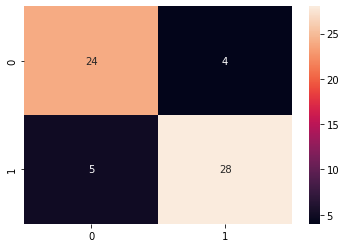

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred= automl.predict(X_test)
conf_matrix= confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot=True)

In [ ]:
# Score of the final ensemble
from sklearn.metrics import accuracy_score
m1_acc_score= accuracy_score(y_test, y_pred)
m1_acc_score

0.8524590163934426

In [ ]:
#check null values in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

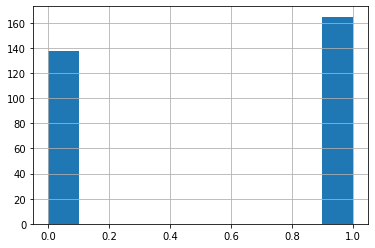

In [ ]:
df['target'].hist()

In [ ]:
from sklearn.utils import resample
healthy= df[df["target"]==0]
unhealthy=df[df["target"]==1]

In [ ]:
healthy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
up_sampled=resample(healthy, replace=True, n_samples=len(unhealthy), random_state=42)

In [ ]:
up_sampled=pd.concat([unhealthy, up_sampled])
#check updated class counts
up_sampled['target'].value_counts()

1    165
0    165
Name: target, dtype: int64

In [ ]:
X1=up_sampled.drop(['target'],axis=1)
y1=up_sampled['target']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size=0.2, random_state=42)
X1_train.shape, X1_test.shape,y1_train.shape, y1_test.shape

((264, 13), (66, 13), (264,), (66,))

In [ ]:
import autosklearn.classification
automl = autosklearn.classification.AutoSklearnClassifier(
time_left_for_this_task=5*60,per_run_time_limit=30,tmp_folder='/temp2/autosklearn_classification_example_tmp')
automl.fit(X1_train, y1_train)

AutoSklearnClassifier(per_run_time_limit=30, time_left_for_this_task=300,
                      tmp_folder='/temp2/autosklearn_classification_example_tmp')

In [ ]:
pprint(automl.sprint_statistics())

('auto-sklearn results:\n'
 '  Dataset name: 91bb1866-81e6-11ec-9d18-0242ac1c0002\n'
 '  Metric: accuracy\n'
 '  Best validation score: 0.875000\n'
 '  Number of target algorithm runs: 77\n'
 '  Number of successful target algorithm runs: 77\n'
 '  Number of crashed target algorithm runs: 0\n'
 '  Number of target algorithms that exceeded the time limit: 0\n'
 '  Number of target algorithms that exceeded the memory limit: 0\n')


In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight                 type      cost  duration
model_id                                                                
12           1             0.04    gradient_boosting  0.125000  1.298650
2            2             0.02        random_forest  0.136364  1.647419
10           3             0.04    gradient_boosting  0.136364  1.117335
22           4             0.04          extra_trees  0.136364  1.975416
5            5             0.02        random_forest  0.147727  1.786416
73           6             0.04          extra_trees  0.147727  1.848646
68           7             0.04          extra_trees  0.147727  1.621835
17           8             0.04             adaboost  0.147727  1.291294
24           9             0.06             adaboost  0.147727  1.605762
45          10             0.04                  lda  0.147727  1.184076
57          11             0.02          gaussian_nb  0.159091  1.354492
30          12             0.02    gradient_boostin

In [ ]:
pprint(automl.show_models())

{2: {'balancing': Balancing(random_state=1),
     'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fdf8d64b390>,
     'cost': 0.13636363636363635,
     'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fdf8d9532d0>,
     'ensemble_weight': 0.02,
     'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fdf8d64b1d0>,
     'model_id': 2,
     'rank': 2,
     'sklearn_classifier': RandomForestClassifier(max_features=3, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)},
 5: {'balancing': Balancing(random_state=1),
     'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fdf8db569d0>,
     'cost': 0.1477272727272727,
     'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fdf8db72b50>,
     'ense

In [ ]:
automl.score(X1_train, y1_train)

0.9659090909090909

In [ ]:
automl.score(X1_test, y1_test)

0.8484848484848485

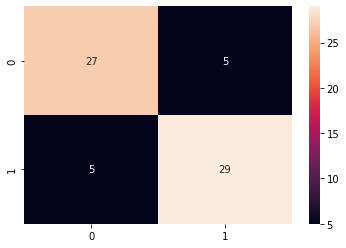

In [ ]:
# Score of the final ensemble
from sklearn.metrics import confusion_matrix, accuracy_score
y1_pred= automl.predict(X1_test)
conf_matrix= confusion_matrix(y1_pred, y1_test)
sns.heatmap(conf_matrix, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
m2_acc_score= accuracy_score(y1_test, y1_pred)
m2_acc_score

0.8484848484848485

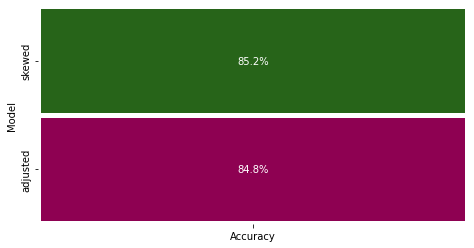

In [ ]:
model_eval = pd.DataFrame({'Model': ['skewed','adjusted'], 'Accuracy': [m1_acc_score,
                    m2_acc_score]})
model_eval = model_eval.set_index('Model').sort_values(by='Accuracy',ascending=False)
fig = plt.figure(figsize=(20, 4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.6, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
sns.heatmap(model_eval,cmap="PiYG",annot=True,fmt=".1%", linewidths=4,cbar=False,ax=ax0)
plt.show()

In [ ]:
import pickle
# save the model 
filename = 'final_model.sav' 
pickle.dump(automl, open(filename, 'wb'))

In [ ]:
#load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8852459016393442


In [ ]:
import joblib
# save the model 
filename = 'final_model.sav'
joblib.dump(automl, filename)


['final_model.sav']